In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\Stuart_bm\Stuart_bmcite_RNAassay_original.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata = sc.read_h5ad(dataset_dir / 'Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata.shape

(30672, 17009)

In [3]:
adata.obs.head()

,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight
a_AAACCTGAGCTTATCG-1,7546.0,2136,1350.0,25,HumanHTO4,batch1,Progenitor cells,Prog_RBC,0.482701
a_AAACCTGAGGTGGGTT-1,1029.0,437,2970.0,25,HumanHTO1,batch1,T cell,gdT,0.241789
a_AAACCTGAGTACATGA-1,1111.0,429,2474.0,23,HumanHTO5,batch1,T cell,CD4 Naive,0.507714
a_AAACCTGCAAACCTAC-1,2741.0,851,4799.0,25,HumanHTO3,batch1,T cell,CD4 Memory,0.431308
a_AAACCTGCAAGGTGTG-1,2099.0,843,5434.0,25,HumanHTO2,batch1,Mono/DC,CD14 Mono,0.568508


In [4]:
# Level1
labels = adata.obs['celltype.l1'].tolist()
types = np.unique(labels).tolist()
types

['B cell', 'Mono/DC', 'NK', 'Progenitor cells', 'T cell']

In [5]:
# Level2
labels_l2 = adata.obs['celltype.l2'].tolist()
types_l2 = np.unique(labels_l2).tolist()
types_l2

['CD14 Mono',
 'CD16 Mono',
 'CD4 Memory',
 'CD4 Naive',
 'CD56 bright NK',
 'CD8 Effector_1',
 'CD8 Effector_2',
 'CD8 Memory_1',
 'CD8 Memory_2',
 'CD8 Naive',
 'GMP',
 'HSC',
 'LMPP',
 'MAIT',
 'Memory B',
 'NK',
 'Naive B',
 'Plasmablast',
 'Prog_B 1',
 'Prog_B 2',
 'Prog_DC',
 'Prog_Mk',
 'Prog_RBC',
 'Treg',
 'cDC2',
 'gdT',
 'pDC']

## Read annotation result from SingleR (Level: Main)

In [6]:
pred_main = pd.read_csv('SingleR_pred_Stuart_main.csv', index_col=0)
pred_main.head()

,scores.B.cells,scores.Basophils,scores.CD4..T.cells,scores.CD8..T.cells,scores.Dendritic.cells,scores.Monocytes,scores.Neutrophils,scores.NK.cells,scores.Progenitors,scores.T.cells,labels,delta.next,pruned.labels
a_AAACCTGAGCTTATCG-1,0.212806,0.228598,0.178824,0.177405,0.245558,0.221112,0.096947,0.179989,0.360338,0.157618,Progenitors,0.114781,Progenitors
a_AAACCTGAGGTGGGTT-1,0.166235,0.124683,0.208330,0.201093,0.151639,0.157725,0.092420,0.198424,0.145168,0.208323,T cells,0.020157,T cells
a_AAACCTGAGTACATGA-1,0.132572,0.096306,0.207602,0.195583,0.116745,0.109593,0.054614,0.152263,0.128417,0.176222,CD4+ T cells,0.076869,CD4+ T cells
a_AAACCTGCAAACCTAC-1,0.191185,0.146038,0.281320,0.259066,0.175325,0.179699,0.120317,0.243146,0.164987,0.257779,CD4+ T cells,0.053873,CD4+ T cells
a_AAACCTGCAAGGTGTG-1,0.272744,0.185577,0.120035,0.108647,0.335246,0.339242,0.242884,0.160660,0.250682,0.116020,Monocytes,0.084063,Monocytes


In [7]:
pred_types_main = np.unique(pred_main['labels']).tolist()
pred_types_main

['B cells',
 'Basophils',
 'CD4+ T cells',
 'CD8+ T cells',
 'Dendritic cells',
 'Monocytes',
 'NK cells',
 'Progenitors',
 'T cells']

In [8]:
# NA in pruned.labels
pred_main['pruned.labels'].isna().sum()

178

In [9]:
a = ['B cells',
 'CD4+ T cells',
 'CD8+ T cells',
 'Dendritic cells',
 'Monocytes',
 'NK cells',
 'Progenitors',
 'T cells']  # SingleR predicted
b = ['B cell', 'T cell', 'T cell', 'Mono/DC', 'Mono/DC', 'NK', 'Progenitor cells', 'T cell']  # true labels from bmcite
type_reference = dict(zip(a, b))
type_reference

{'B cells': 'B cell',
 'CD4+ T cells': 'T cell',
 'CD8+ T cells': 'T cell',
 'Dendritic cells': 'Mono/DC',
 'Monocytes': 'Mono/DC',
 'NK cells': 'NK',
 'Progenitors': 'Progenitor cells',
 'T cells': 'T cell'}

In [10]:
# pred_main['converted_labels'] = None
for cell in pred_main.index:
    if pred_main.loc[cell, 'labels'] in type_reference:
        pred_main.loc[cell, 'converted_labels'] = type_reference[pred_main.loc[cell, 'labels']]
    else:
        pred_main.loc[cell, 'converted_labels'] = pred_main.loc[cell, 'labels']
pred_main.head()

,scores.B.cells,scores.Basophils,scores.CD4..T.cells,scores.CD8..T.cells,scores.Dendritic.cells,scores.Monocytes,scores.Neutrophils,scores.NK.cells,scores.Progenitors,scores.T.cells,labels,delta.next,pruned.labels,converted_labels
a_AAACCTGAGCTTATCG-1,0.212806,0.228598,0.178824,0.177405,0.245558,0.221112,0.096947,0.179989,0.360338,0.157618,Progenitors,0.114781,Progenitors,Progenitor cells
a_AAACCTGAGGTGGGTT-1,0.166235,0.124683,0.208330,0.201093,0.151639,0.157725,0.092420,0.198424,0.145168,0.208323,T cells,0.020157,T cells,T cell
a_AAACCTGAGTACATGA-1,0.132572,0.096306,0.207602,0.195583,0.116745,0.109593,0.054614,0.152263,0.128417,0.176222,CD4+ T cells,0.076869,CD4+ T cells,T cell
a_AAACCTGCAAACCTAC-1,0.191185,0.146038,0.281320,0.259066,0.175325,0.179699,0.120317,0.243146,0.164987,0.257779,CD4+ T cells,0.053873,CD4+ T cells,T cell
a_AAACCTGCAAGGTGTG-1,0.272744,0.185577,0.120035,0.108647,0.335246,0.339242,0.242884,0.160660,0.250682,0.116020,Monocytes,0.084063,Monocytes,Mono/DC


In [11]:
np.unique(pred_main['converted_labels'])

array(['B cell', 'Basophils', 'Mono/DC', 'NK', 'Progenitor cells',
       'T cell'], dtype=object)

In [31]:
true_labels = adata.obs['celltype.l1']
predicted_labels = pred_main['converted_labels']

cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['SingleR predicted'], margins=False)
col_order = cm.columns.tolist()
col_order.append(col_order.pop(col_order.index('Basophils')))
cm = cm.reindex(col_order, axis=1)
cm

SingleR predicted,B cell,Mono/DC,NK,Progenitor cells,T cell,Basophils
True,,,,,,
B cell,3738,4,3,1,7,0
Mono/DC,11,7716,2,0,0,0
NK,1,10,1330,0,69,0
Progenitor cells,180,886,9,1784,19,1
T cell,75,10,627,9,14180,0


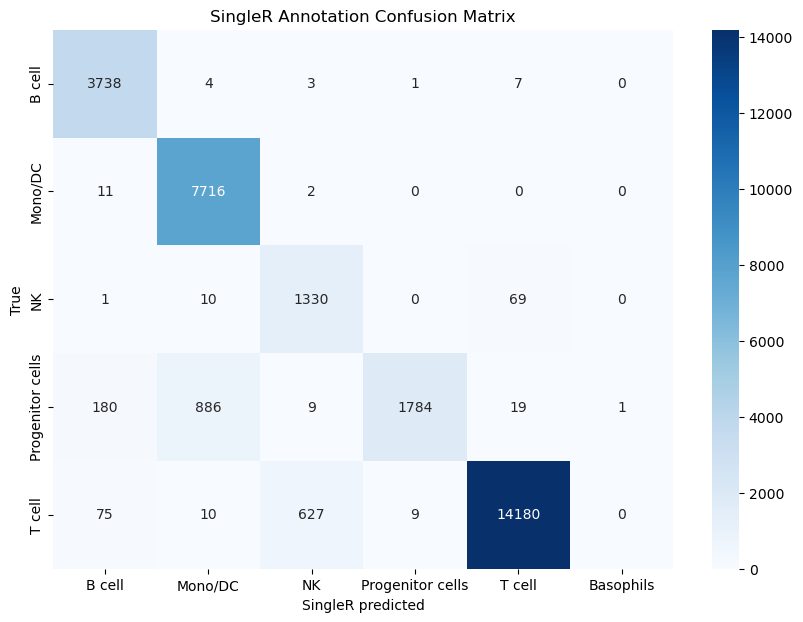

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix')
plt.show()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

method = ['micro', 'macro', 'weighted']
for m in method:
    precision = precision_score(true_labels, predicted_labels, average=m)
    print(f"{m} Precision:", precision)
    f1 = f1_score(true_labels, predicted_labels, average=m)
    print(f"{m} F1 Score:", f1)

Accuracy: 0.9372717788210746
micro Precision: 0.9372717788210746
micro F1 Score: 0.9372717788210746
macro Precision: 0.7483989274041294
macro F1 Score: 0.738255262680808
weighted Precision: 0.9465525897543305
weighted F1 Score: 0.9357450400938799


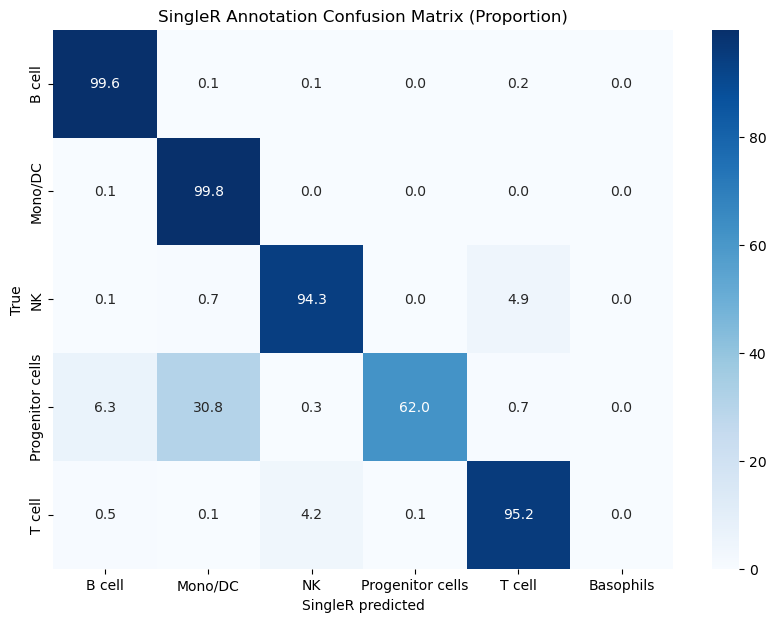

In [33]:
row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0) * 100
plt.figure(figsize=(10, 7))
sns.heatmap(cm_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix (Proportion)')
plt.show()

## Level: Fine

In [16]:
pred_fine = pd.read_csv('SingleR_pred_Stuart_fine.csv', index_col=0)
pred_fine.head()

,scores.Central.memory.CD8.T.cells,scores.Classical.monocytes,scores.Effector.memory.CD8.T.cells,scores.Exhausted.B.cells,scores.Follicular.helper.T.cells,scores.Intermediate.monocytes,scores.Low.density.basophils,scores.Low.density.neutrophils,scores.MAIT.cells,scores.Myeloid.dendritic.cells,...,scores.Terminal.effector.CD4.T.cells,scores.Terminal.effector.CD8.T.cells,scores.Th1.cells,scores.Th1.Th17.cells,scores.Th17.cells,scores.Th2.cells,scores.Vd2.gd.T.cells,labels,delta.next,pruned.labels
a_AAACCTGAGCTTATCG-1,0.160151,0.215589,0.153525,0.205802,0.171847,0.208183,0.228966,0.150963,0.154565,0.235771,...,0.155167,0.157155,0.178328,0.162868,0.158717,0.166834,0.156120,Progenitor cells,0.071453,Progenitor cells
a_AAACCTGAGGTGGGTT-1,0.187879,0.155442,0.182841,0.174505,0.188442,0.172146,0.141436,0.124833,0.200763,0.163159,...,0.184654,0.186274,0.190951,0.194809,0.196192,0.191026,0.194474,MAIT cells,0.005712,MAIT cells
a_AAACCTGAGTACATGA-1,0.176446,0.121028,0.158399,0.140406,0.192620,0.133586,0.115197,0.086461,0.170990,0.132305,...,0.178171,0.159461,0.196956,0.189071,0.187917,0.194472,0.174995,Naive CD4 T cells,0.077517,Naive CD4 T cells
a_AAACCTGCAAACCTAC-1,0.260556,0.180533,0.248089,0.193797,0.270723,0.202709,0.170194,0.146931,0.251160,0.192995,...,0.258023,0.246809,0.276046,0.271766,0.268191,0.267502,0.252973,Th1 cells,0.020619,Th1 cells
a_AAACCTGCAAGGTGTG-1,0.147267,0.325575,0.150999,0.268005,0.149107,0.314550,0.210466,0.255098,0.143707,0.316344,...,0.166301,0.155451,0.158691,0.151286,0.151530,0.154323,0.156477,Classical monocytes,0.093233,Classical monocytes


In [17]:
pred_types_fine = np.unique(pred_fine['labels']).tolist()
pred_types_fine

['Central memory CD8 T cells',
 'Classical monocytes',
 'Effector memory CD8 T cells',
 'Exhausted B cells',
 'Follicular helper T cells',
 'Intermediate monocytes',
 'Low-density basophils',
 'MAIT cells',
 'Myeloid dendritic cells',
 'Naive B cells',
 'Naive CD4 T cells',
 'Naive CD8 T cells',
 'Natural killer cells',
 'Non classical monocytes',
 'Non-Vd2 gd T cells',
 'Non-switched memory B cells',
 'Plasmablasts',
 'Plasmacytoid dendritic cells',
 'Progenitor cells',
 'Switched memory B cells',
 'T regulatory cells',
 'Terminal effector CD4 T cells',
 'Terminal effector CD8 T cells',
 'Th1 cells',
 'Th1/Th17 cells',
 'Th17 cells',
 'Th2 cells',
 'Vd2 gd T cells']

## Reorder celltypes

In [18]:
ref_celltypes = pd.read_csv('Monaco_ref_celltypes.csv', index_col=0)

In [19]:
# Define the custom order
custom_order = ['B cells', 'CD4+ T cells', 'CD8+ T cells', 'Dendritic cells', 'Monocytes', 'NK cells', 'T cells', 'Basophils', 'Neutrophils', 'Progenitors']

# Reorder the dataframe
ref_celltypes['label.main'] = pd.Categorical(ref_celltypes['label.main'], categories=custom_order, ordered=True)
ref_celltypes = ref_celltypes.sort_values('label.main')

# Print the reordered dataframe
ref_celltypes


,label.main,label.fine
16,B cells,Naive B cells
17,B cells,Non-switched memory B cells
18,B cells,Exhausted B cells
19,B cells,Switched memory B cells
20,B cells,Plasmablasts
8,CD4+ T cells,Follicular helper T cells
9,CD4+ T cells,T regulatory cells
10,CD4+ T cells,Th1 cells
11,CD4+ T cells,Th1/Th17 cells
12,CD4+ T cells,Th17 cells


In [35]:
# Get the true labels
true_labels = adata.obs['celltype.l2']

# Get the predicted labels
predicted_labels = pred_fine['labels']

# Create the confusion matrix
# cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['Predicted'], margins=False)
cm = pd.crosstab(true_labels, predicted_labels, margins=False)

In [36]:
row_order = [
'Naive B',
'Memory B',
'CD4 Naive',
'CD4 Memory',
'CD8 Naive',
'CD8 Effector_1',
'CD8 Effector_2',
'CD8 Memory_1',
'CD8 Memory_2',
'gdT',
'Treg',
'MAIT',
'cDC2',
'pDC',
'CD14 Mono',
'CD16 Mono',
'NK',
'CD56 bright NK',
'Plasmablast',
'HSC',
'GMP',
'LMPP',
'Prog_RBC',
'Prog_B 1',
'Prog_B 2',
'Prog_DC',
'Prog_Mk',
]

In [38]:
col_order = [c for c in ref_celltypes['label.fine'] if c in cm.columns]

In [39]:
cm = cm[col_order]
# Reorder index
cm = cm.reindex(row_order, axis='index')
cm

labels,Naive B cells,Non-switched memory B cells,Exhausted B cells,Switched memory B cells,Plasmablasts,Follicular helper T cells,T regulatory cells,Th1 cells,Th1/Th17 cells,Th17 cells,...,Myeloid dendritic cells,Classical monocytes,Intermediate monocytes,Non classical monocytes,Natural killer cells,Vd2 gd T cells,MAIT cells,Non-Vd2 gd T cells,Low-density basophils,Progenitor cells
celltype.l2,,,,,,,,,,,,,,,,,,,,,
Naive B,1540,198,121,33,0,1,0,0,0,0,...,1,3,1,0,0,0,0,0,0,0
Memory B,86,655,273,609,0,0,1,0,0,0,...,0,0,0,0,1,2,0,0,0,0
CD4 Naive,6,1,5,2,1,132,354,286,30,10,...,0,0,1,0,2,10,0,2,0,3
CD4 Memory,0,0,1,4,0,461,379,739,744,289,...,1,1,2,0,14,50,47,5,0,1
CD8 Naive,6,0,2,2,0,14,95,122,10,0,...,1,1,1,1,7,25,8,4,0,2
CD8 Effector_1,0,0,0,0,0,0,1,5,1,0,...,0,0,0,0,172,164,0,86,0,0
CD8 Effector_2,3,0,0,1,0,1,2,7,1,0,...,1,0,1,0,53,101,13,37,0,0
CD8 Memory_1,0,0,0,0,0,3,12,69,21,6,...,0,0,0,0,16,124,27,9,0,1
CD8 Memory_2,0,0,0,0,0,1,3,27,6,2,...,0,0,1,0,100,153,6,54,0,0


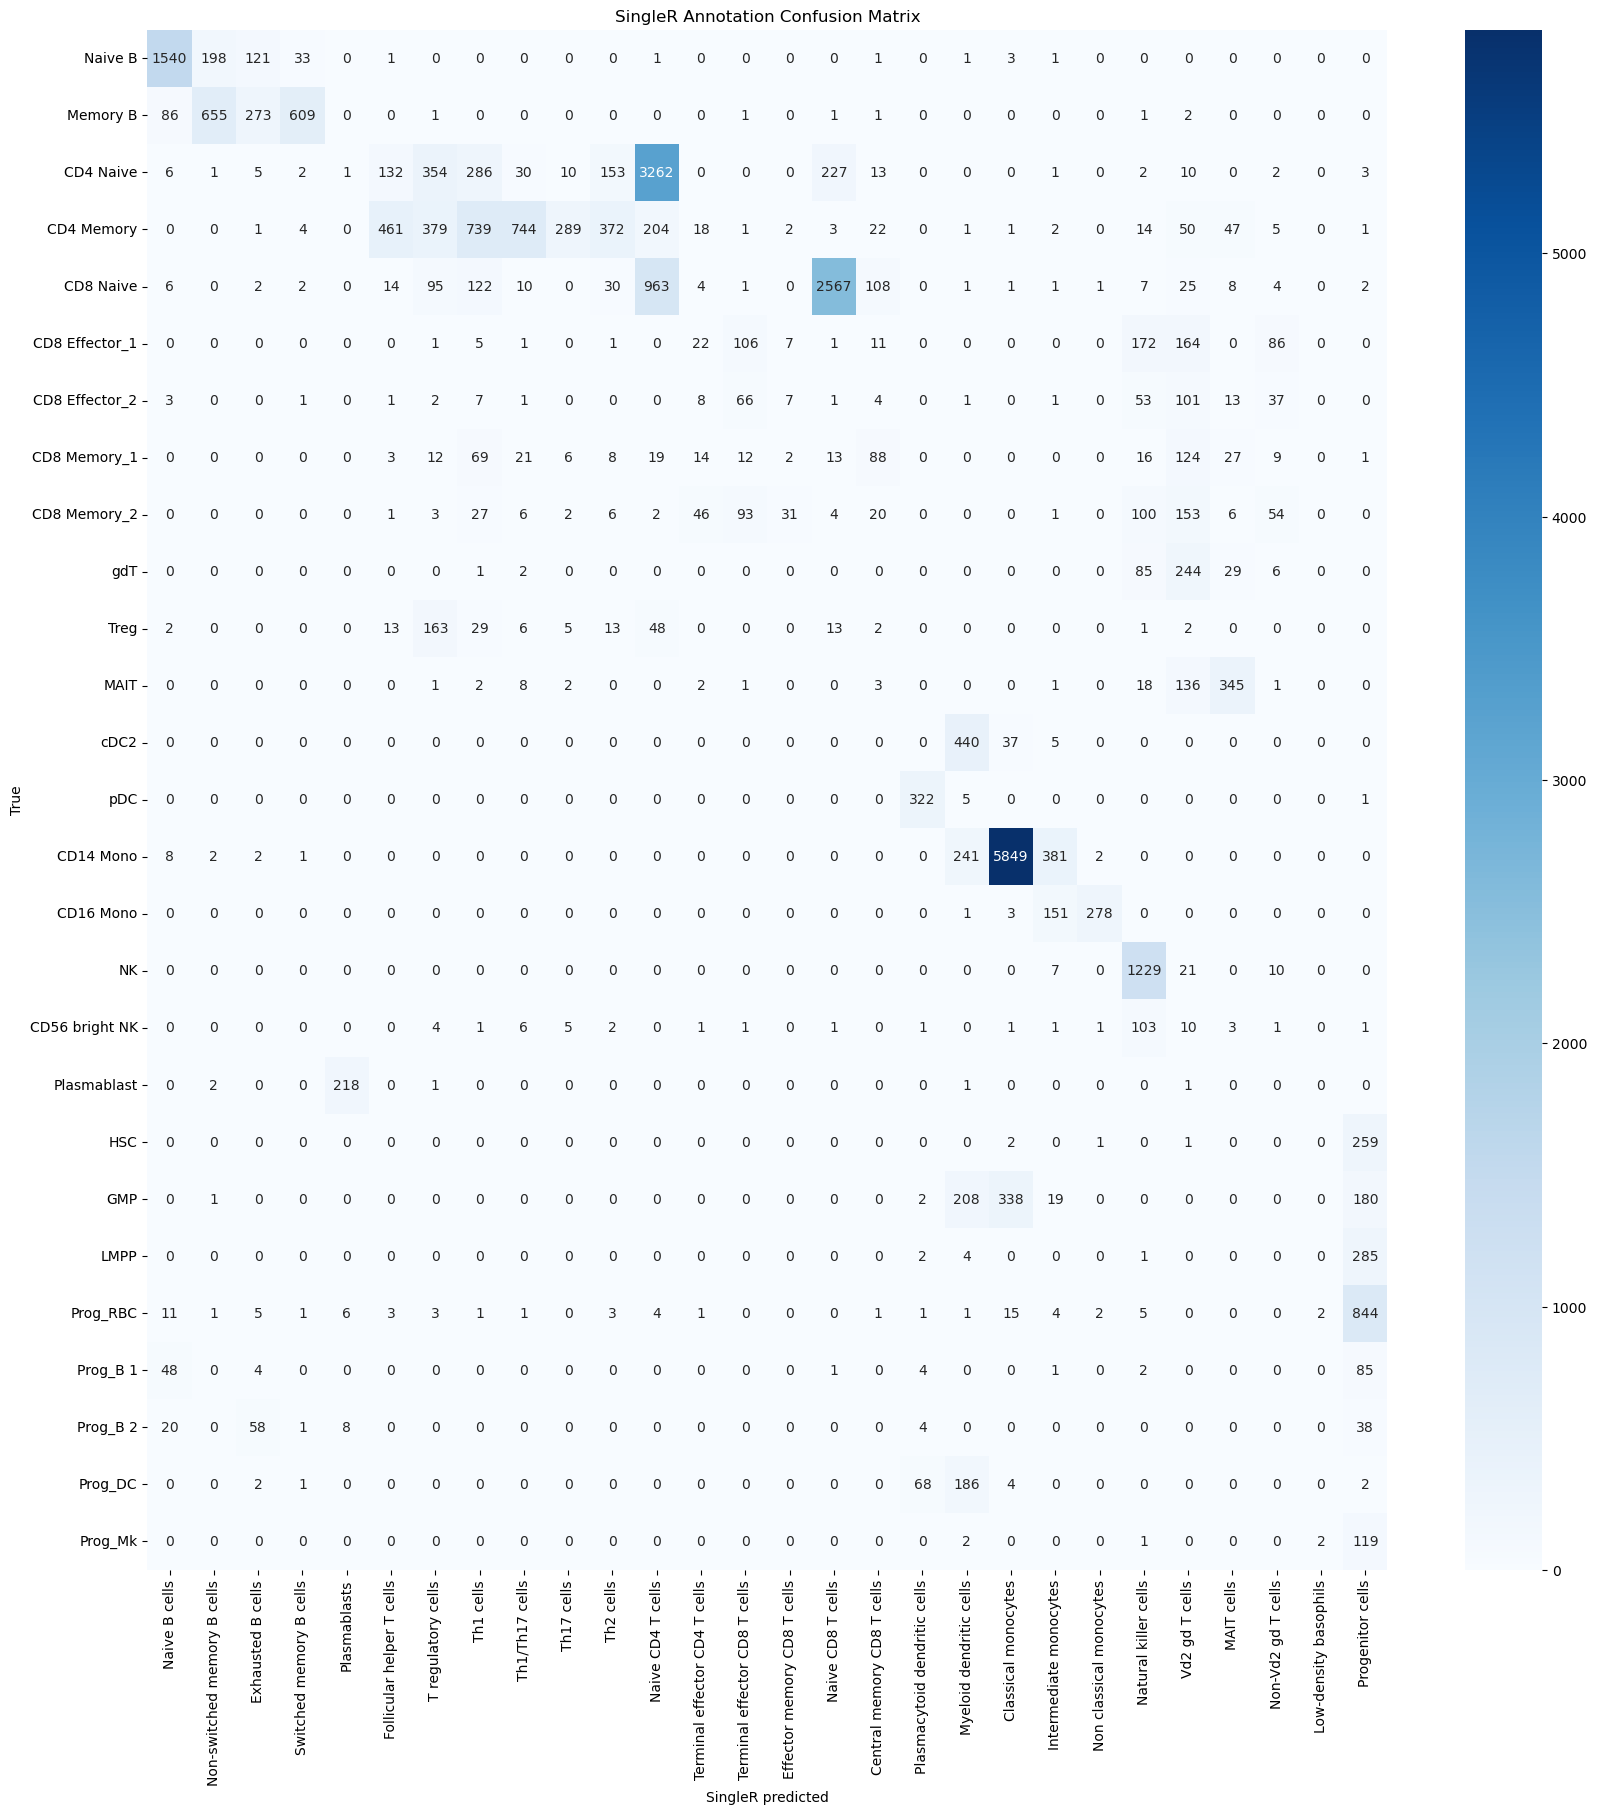

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('SingleR predicted')
plt.ylabel('True')
plt.title('SingleR Annotation Confusion Matrix')
plt.show()

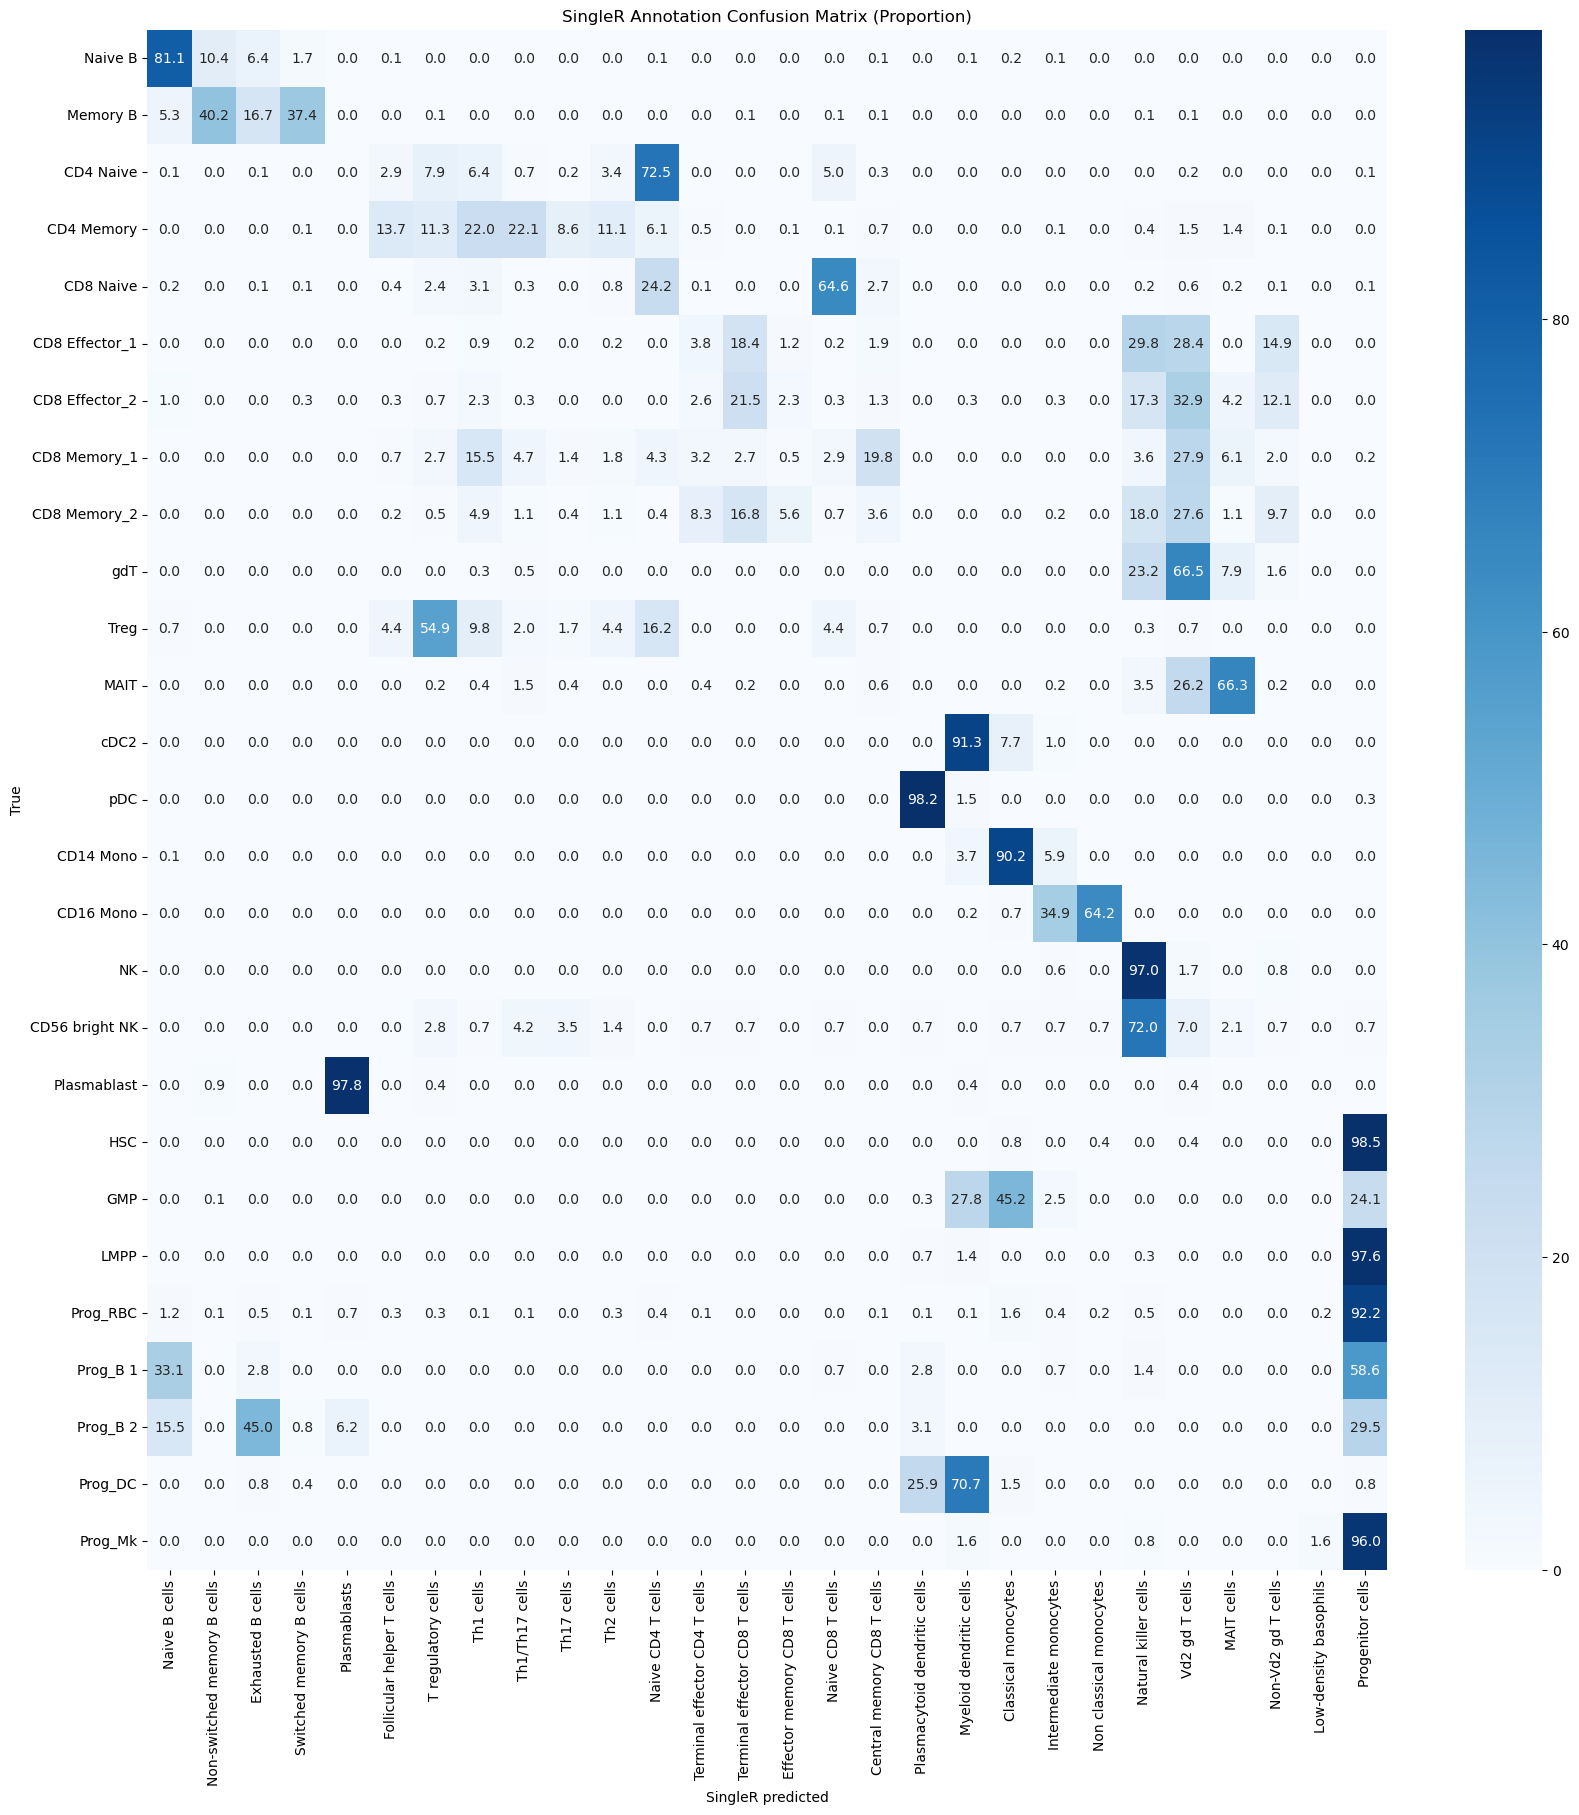

In [42]:
row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0) * 100
plt.figure(figsize=(20, 20))
sns.heatmap(cm_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel('SingleR predicted')
plt.ylabel('True')
plt.title('SingleR Annotation Confusion Matrix (Proportion)')
plt.show()